In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import isfile, join
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import string
import warnings
import seaborn
from scipy.special import softmax

# Préprocessing

In [2]:
#Fonction permettant d'importer les données d'un language du dataset

def importerUnLanguage(emplacement_dataset, langage):
    path_langage = emplacement_dataset+'/'+langage
    list_file_name = [f for f in listdir(path_langage) if isfile(join(path_langage, f))]
    data = []
    for e in list_file_name: 
        path = path_langage+"/"+e
        file = open(path, "r")
        data.append(file.read())
        file.close()

    return data

In [3]:
nom_dataset='dataset_v2' # Emplacement du dataset

scripts_html = importerUnLanguage(nom_dataset, 'html')
scripts_python = importerUnLanguage(nom_dataset, 'python')
scripts_C = importerUnLanguage(nom_dataset, 'c')
scripts_java = importerUnLanguage(nom_dataset, 'java')

In [4]:
print("nombre de scripts disponibles :")
print("scripts_html contient",len(scripts_html),"scripts html")
print("scripts_python contient :",len(scripts_python),"scripts python")
print("scripts_C contient :",len(scripts_C),"scripts C")
print("scripts_java contient :",len(scripts_java),"scripts java")

nombre de scripts disponibles :
scripts_html contient 12001 scripts html
scripts_python contient : 12001 scripts python
scripts_C contient : 12001 scripts C
scripts_java contient : 12001 scripts java


On a 12000 scripts disponibles par language

On affiche quelques exemples : 

In [5]:
print("2 scripts html pris au hasard :")
for i in range(2):
    print("---------------------------------------------------------------------------------------")
    n = random.randint(1,12000)
    print(scripts_html[n])
    
print("/////////////////////////////////////////////////////////////////////////////////////////")

print("2 scripts python pris au hasard :")
for i in range(2):
    print("---------------------------------------------------------------------------------------")
    n = random.randint(1,12000)
    print(scripts_python[n])

print("/////////////////////////////////////////////////////////////////////////////////////////")

print("2 scripts C pris au hasard :")
for i in range(2):
    print("---------------------------------------------------------------------------------------")
    n = random.randint(1,12000)
    print(scripts_C[n])

print("/////////////////////////////////////////////////////////////////////////////////////////")

print("2 scripts java pris au hasard :")
for i in range(2):
    print("---------------------------------------------------------------------------------------")
    n = random.randint(1,12000)
    print(scripts_java[n])

2 scripts html pris au hasard :
---------------------------------------------------------------------------------------
http://browse.deviantart.com/resources/applications/psbrushes/?order=9    

Sorted by Popular
Sorted by All Time 
Sorted by 24 Items Per Page

The Author
The Title
The Description
Download the File (create folder based on title name)
Download the Image (place in folder with the file above)
Create text file with the author, title, and description in it

<div class="tt-a" usericon="http://a.deviantart.net/avatars/s/h/shad0w-gfx.gif" collect_rid="1:19982524">
 <span class="shad0w" style="background-image: url ("http://sh.deviantart.net/shad0w/x/107/150/logo3.png");">
  <a class="t" title="Shad0ws Blood Brush Set by ~Shad0w-GFX, Jun 28, 2005" href="http://Shad0w-GFX.deviantart.com/art/Shad0ws-Blood-Brush-Set-19982524?q=boost%3Apopular+in%3Aresources%2Fapplications%2Fpsbrushes&qo-0">Shad0ws Blood Brush Set</a>

<a class="t" ... >

divs = []
client = new WebClient(BrowserVe

On applique un filtre pour garder uniquement les scripts d'au moins 1024 caractères. 

Ensuite, on coupe le script de manière à garder les 1024 premiers caractères. 

Voici les fonctions adéquates pour effectuer cela :

In [6]:
def filter_size(scripts, size_min): #garde les scripts de data qui font au moins size_min caracters
    res = []
    for script in scripts:
        if(len(script)>=size_min):
            res.append(script)
    return res

In [7]:
def keep_n_first_caracters(scripts,n): #garde les n premiers caractères de chaque script
    res = []
    for script in scripts:
        res.append(script[:n])
    return res

On applique ces transformations à nos données puis on regarde le nombre de scripts restant et l'allure de quelques scripts tirès au hasard

In [8]:
n = 1024
html_filtre_and_cut = keep_n_first_caracters(filter_size(scripts_html,n),n)
python_filtre_and_cut = keep_n_first_caracters(filter_size(scripts_python,n),n)
C_filtre_and_cut = keep_n_first_caracters(filter_size(scripts_C,n),n)
java_filtre_and_cut = keep_n_first_caracters(filter_size(scripts_java,n),n)

In [9]:
print("nombre de scripts restant :")
print("scripts html restant:",len(html_filtre_and_cut))
print("scripts python  restant:",len(python_filtre_and_cut))
print("scripts_C restant :",len(C_filtre_and_cut))
print("scripts_java restant :",len(java_filtre_and_cut))

nombre de scripts restant :
scripts html restant: 1568
scripts python  restant: 1338
scripts_C restant : 1720
scripts_java restant : 2035


Il nous reste aux alentours de 1500-2000 scripts par language : on estime que c'est convenable

In [10]:
print("script html de taille sup à 1024 pris au hasard coupé :\n")

n = random.randint(1,len(html_filtre_and_cut))
print(html_filtre_and_cut[n])

print('///////////////////////////////////////////////////////////////////////////////:')
print("script python de taille sup à 1024 pris au hasard coupé :\n")
n = random.randint(1,len(python_filtre_and_cut))
print(python_filtre_and_cut[n])

print('///////////////////////////////////////////////////////////////////////////////:')
print("script C de taille sup à 1024 pris au hasard coupé :\n")
n = random.randint(1,len(C_filtre_and_cut))
print(C_filtre_and_cut[n])
    
print('///////////////////////////////////////////////////////////////////////////////:')
print("script java de taille sup à 1024 pris au hasard coupé :\n")
n = random.randint(1,len(java_filtre_and_cut))
print(java_filtre_and_cut[n])

script html de taille sup à 1024 pris au hasard coupé :

public class MyBimapTest extends Activity {
/** Called when the activity is first created. */
@Override
public void onCreate(Bundle savedInstanceState) {
    super.onCreate(savedInstanceState);
    setContentView(R.layout.main);

    ImageView img1 = (ImageView) findViewById(R.id.ImageView01);

    img1.setVisibility(View.INVISIBLE);
    Drawable dra1 = img1.getDrawable();
    Bitmap map1 = ((BitmapDrawable) dra1).getBitmap();
    ImageView img2 = (ImageView) findViewById(R.id.ImageView02);
    img2.setVisibility(View.INVISIBLE);
    Drawable dra2 = img2.getDrawable();
    Bitmap map2 = ((BitmapDrawable) dra2).getBitmap();

    // ***
    ByteArrayOutputStream baos = new ByteArrayOutputStream();
    map1.compress(Bitmap.CompressFormat.JPEG, 100, baos);

    byte[] b = baos.toByteArray();
    String abc = Base64.encodeBytes(b);

    byte[] byt = null;
    try {
        byt = Base64.decode(abc);
    } catch (IOException e) {
      

On met en forme tout cela dans un seul dataset labelisé. 

On crée directement les jeux d'entrainement et de test.

In [11]:
def compil(*languages):
    data = []
    labels = []
    for scripts in languages:
        for script in scripts[0]:
            data.append(script)
            labels.append(scripts[1])
    X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.30)
    Y_train=np.array(Y_train)
    Y_test=np.array(Y_test)
    return X_train, X_test, Y_train, Y_test

In [12]:
html_with_label = [html_filtre_and_cut,'h']
python_with_label = [python_filtre_and_cut,'p']
C_with_label = [C_filtre_and_cut,'C']
java_with_label = [java_filtre_and_cut,'j']

X_train, X_test, Y_train, Y_test = compil(html_with_label, python_with_label, C_with_label, java_with_label)


In [13]:
print("taille dataset d'entrainement: ", len(X_train))
print("taille dataset de test: ", len(X_test))

taille dataset d'entrainement:  4662
taille dataset de test:  1999


On effectue maintenant le OneHotEncoding : on affecte à chaque caractère son nombre dans la tables ASCII (il y en a 101), puis on vectorise. Ainsi chaque script est représenté avec un array de taille 1024 *101

In [14]:
def oneHotEncoding(samples):
    characters = string.printable  # All printable ASCII characters.
    token_index = dict(zip(characters, range(1, len(characters) + 1)))
    max_length = 1024
    results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
    for i, sample in enumerate(samples):
        for j, character in enumerate(sample[:max_length]):
            index = token_index.get(character)
            results[i, j, index] = 1.
    return results

In [15]:
X_train = oneHotEncoding(X_train)
X_test = oneHotEncoding(X_test)

X_train est de dimension (nombre de scripts)*(taille des scripts)*(nombre de caractères différents)

Maintenant on fait une binarisation multilabel de Y

In [16]:
mlb = MultiLabelBinarizer()
mlb.fit(['h','p','C','j'])

MultiLabelBinarizer()

In [17]:
Y_train = mlb.transform(Y_train)
Y_test = mlb.transform(Y_test)

In [18]:
print("Classes :",mlb.classes_,' pour C, html, java, python')
print("allure de Y_train :\n",Y_train)


Classes : ['C' 'h' 'j' 'p']  pour C, html, java, python
allure de Y_train :
 [[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 ...
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [19]:
print("représentation d'un script:",X_train[1,:,:])

représentation d'un script: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; 

def confusion(Y_pred, Y_test, labels, name, no_diag=False):
    Y_pred_arg = [labels[np.argmax(x)] for x in Y_pred]
    Y_test_arg = [labels[np.argmax(x)] for x in Y_test]
    conf = confusion_matrix(Y_test_arg, Y_pred_arg, labels=labels)
    if(no_diag) : np.fill_diagonal(conf, 0)
    sns.heatmap(conf, xticklabels=labels, yticklabels=labels,  cmap='coolwarm', annot=True, fmt="d")

    plt.title(f"Matrice de confusion\n{name}")
    plt.ylabel("vraies valeurs")
    plt.xlabel("prédictions")


    plt.savefig(f"confusions/{name}.png", facecolor="white", transparent=False)

    plt.show()

# Création du modèle

## Modèle de l'article

In [25]:
n_in = 512
n_out = 4
p_dropout = 0.5
prog_langs = ["html", "python", "c", "java"]

BATCH_SIZE = 128
EPOCHS = 3
# LEARNING_RATE = 0.01
MOMENTUM = 0.9

/home/nathan/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:994: UserWarning: unknown class(es) ['a', 'l', 'm', 'n', 'o', 't', 'v', 'y'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


((9908, 512, 101), (9908, 4))

In [22]:
# alphabet = "abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:’’’/\|_@#$%ˆ&*˜‘+-=<>()[]{}"



model_article = keras.models.Sequential()
model_article.add(keras.layers.Conv1D(n_in, 7, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.MaxPool1D(3))
model_article.add(keras.layers.Conv1D(n_in, 7, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.MaxPool1D(3))
model_article.add(keras.layers.Conv1D(n_in, 3, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.Conv1D(n_in, 3, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.Conv1D(n_in, 3, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.Conv1D(n_in, 3, activation='relu', input_shape=(n_in, 101)))
model_article.add(keras.layers.MaxPool1D(3))
model_article.add(keras.layers.Flatten())
model_article.add(keras.layers.Dense(2048, activation='relu'))
model_article.add(keras.layers.Dropout(p_dropout, input_shape=(20, 101)))
model_article.add(keras.layers.Dense(2048, activation='relu'))
model_article.add(keras.layers.Dropout(p_dropout))
model_article.add(keras.layers.Dense(n_out))



In [23]:

model_article.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 506, 512)          362496    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 168, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 162, 512)          1835520   
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 54, 512)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 52, 512)           786944    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 512)           786944    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 48, 512)           7

In [6]:
model_article.compile(
    optimizer = tf.keras.optimizers.SGD(momentum=0.9), 
    # optimizer = tf.keras.optimizers.SGD(learning_rate = LEARNING_RATE, momentum=0.9), 
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [7]:
model_article.fit(X_train, Y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split=0.3)

Epoch 1/3
55/55 [==============================] - 223s 4s/step - loss: 11.0737 - accuracy: 0.4150 - val_loss: 1.6529 - val_accuracy: 0.4692
Epoch 2/3
55/55 [==============================] - 240s 4s/step - loss: 1.6515 - accuracy: 0.4637 - val_loss: 1.6494 - val_accuracy: 0.4692
Epoch 3/3
55/55 [==============================] - 245s 4s/step - loss: 1.6569 - accuracy: 0.4637 - val_loss: 1.6432 - val_accuracy: 0.4692


In [24]:
# model_article.save('models/model_article_3ep_512.h5')

In [21]:
name = "model_article_3ep_1024"

In [22]:
model_article = keras.models.load_model(f"models/{name}.h5")

In [23]:
Y_pred = model_article.predict(X_test)

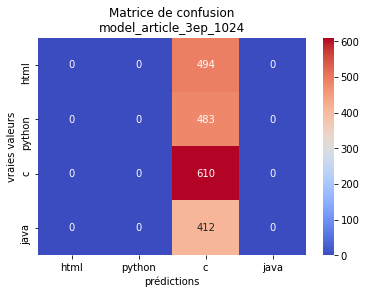

In [31]:
confusion(Y_pred, Y_test, prog_langs, name)

In [24]:
# model_article.evaluate(X_test, Y_test)

133/133 [==============================] - 47s 349ms/step - loss: 1.6656 - accuracy: 0.4683


[1.6655817031860352, 0.46833059191703796]

## Modèle conv 2D

In [25]:
n_in = 1024
n_out = 4
p_dropout = 0.5
prog_langs = ["html", "python", "c", "java"]

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(1024, 101,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(p_dropout))
model.add(keras.layers.Dense(4))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 1022, 99, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 511, 49, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 509, 47, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 254, 23, 64)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 252, 21, 64)       36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 338688)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [38]:
BATCH_SIZE = 32
EPOCHS = 6
LEARNING_RATE = 0.001

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = LEARNING_RATE)
,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_split=0.3) #Par défaut, batch size de 32

Epoch 1/6
102/102 [==============================] - 207s 2s/step - loss: 1.3770 - accuracy: 0.3462 - val_loss: 0.9033 - val_accuracy: 0.6726
Epoch 2/6
102/102 [==============================] - 193s 2s/step - loss: 0.8888 - accuracy: 0.6456 - val_loss: 0.6153 - val_accuracy: 0.7991
Epoch 3/6
102/102 [==============================] - 191s 2s/step - loss: 0.6028 - accuracy: 0.7419 - val_loss: 0.5056 - val_accuracy: 0.8327
Epoch 4/6
102/102 [==============================] - 188s 2s/step - loss: 0.3738 - accuracy: 0.8397 - val_loss: 0.4864 - val_accuracy: 0.8370
Epoch 5/6
102/102 [==============================] - 189s 2s/step - loss: 0.3001 - accuracy: 0.8733 - val_loss: 0.5699 - val_accuracy: 0.8477
Epoch 6/6
102/102 [==============================] - 189s 2s/step - loss: 0.2302 - accuracy: 0.8982 - val_loss: 0.5348 - val_accuracy: 0.8470


In [48]:
model.save('models/model_final.h5')

In [32]:
name = "model_final"

In [33]:
model = keras.models.load_model("models/model_final.h5")

In [34]:
Y_pred = model.predict(X_test)

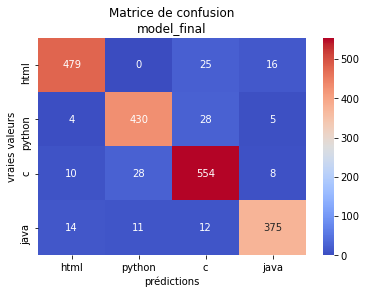

In [35]:
confusion(Y_pred, Y_test, prog_langs, name, False)

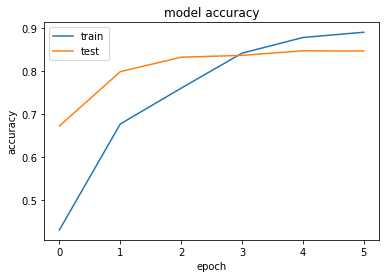

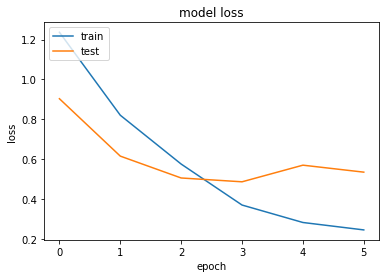

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
evaluation =model.evaluate(X_test,Y_test)
print("La précision sur le jeu de test de", evaluation[1]*100,"%")

63/63 [==============================] - 26s 416ms/step - loss: 0.5623 - accuracy: 0.8429
La précision sur le jeu de test de 84.29214358329773 %


# Prédictions

### Quelques fonctions utiles

On crée une fonction qui fait l'endocage d'un script, dont la sortie pourra être l'objet d'une prédiction du modèle

In [36]:
def preprocessing_script(script): #De la forme ['le_script']
    n = 1024
    if len(script[0])<n:
        warnings.warn("deprecated", DeprecationWarning)
    else:
        script_cut = keep_n_first_caracters(script, n)
        script_encoded = oneHotEncoding(script_cut)
        res = script_encoded.reshape(script_encoded.shape[0],script_encoded.shape[1],script_encoded.shape[2],1)
    return res

On crée une fonction qui décode la sortie

In [37]:
def decoder_sortie(output):
    max_index = np.argmax(output[0], axis=0)
    if(max_index==0):
        return "C"
    if(max_index==1):
        return "html"
    if(max_index==2):
        return "java"
    if(max_index==3):
        return "python"

On crée une fonction prédire qui prend en compte l'encodage et le décodage

In [38]:
def predire(script, retourner_probas = False): # de la forme ['un_script']
    script_endoded = preprocessing_script(script)
    output = model.predict(script_endoded)
    res = decoder_sortie(output)
    if retourner_probas==True:
        return softmax(output)
    return res

Fonction qui sert à lire un fichier

In [39]:
def lire_fichier(path):
    file = open(path, "r")
    script = file.read()
    file.close()
    return script

### Prédictions sur des vrais données

In [40]:
script = [lire_fichier('index.html')]

In [47]:
print(script[0:2000])

['<!DOCTYPE HTML>\n\n<html>\n\t<head>\n\t\t<title>Lucas WANNENMACHER</title>\n\t\t<meta charset="utf-8" />\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n\t\t<link rel="stylesheet" href="assets/css/main.css" />\n\t</head>\n\t<body>\n\n\t\t<!-- Header -->\n\t\t\t<header id="header" class="alt">\n\t\t\t\t<div class="logo"><a href="index.html">\n\t\t\t\t\tPersonal website of <span>lucas WANNENMACHER</span></a></div>\n\t\t\t\t<a href="#menu">Menu</a>\n\t\t\t</header>\n\n\t\t<!-- Nav -->\n\t\t\t<nav id="menu">\n\t\t\t\t<ul class="links">\n\t\t\t\t\t<li><a href="index.html">Home</a></li>\n\t\t\t\t</ul>\n\t\t\t</nav>\n\n\t\t<!-- Banner -->\n\t\t\t<section id="banner">\n\t\t\t\t<div class="inner">\n\t\t\t\t\t<header>\n\t\t\t\t\t\t<h1>Dynamic. Creative. Motivated.</h1>\n\t\t\t\t\t\t<p>\n\t\t\t\t\t\t\tIf you are interested in my profile, you will find here my background, an overview of my skills, my projects and my CV.</p>\n\t\t\t\t\t\t<p> Note: the project section 

In [48]:
print(predire(script))

html


In [49]:
print("probabilités C, html, java, python :")
print(predire(script, True))

probabilités C, html, java, python :
[[0.0010209  0.88256806 0.08191667 0.03449469]]
